# Assignment Task 2: Visualise Data Insights using Seaborn (15 marks)

# Sub Task 1: Data Preparation(2 marks)

* Import libraries and load data
* Change the labelling for better interpretation/ visualization understanding

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [63]:
# change the labelling for better interpretation/ visualization understanding



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thal,target
0,63,Male,typical angina,145,233,Yes,0,150,No,2.3,downsloping,0,normal,Disease
1,37,Male,non-anginal pain,130,250,No,1,187,No,3.5,downsloping,0,fixed defect,Disease
2,41,Female,atypical_angina,130,204,No,0,172,No,1.4,upsloping,0,fixed defect,Disease
3,56,Male,atypical_angina,120,236,No,1,178,No,0.8,upsloping,0,fixed defect,Disease
4,57,Female,asymptomatic,120,354,No,1,163,Yes,0.6,upsloping,0,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,asymptomatic,140,241,No,1,123,Yes,0.2,flat,0,reversable_defect,No disease
299,45,Male,typical angina,110,264,No,1,132,No,1.2,flat,0,reversable_defect,No disease
300,68,Male,asymptomatic,144,193,Yes,1,141,No,3.4,flat,2,reversable_defect,No disease
301,57,Male,asymptomatic,130,131,No,1,115,Yes,1.2,flat,1,reversable_defect,No disease


# Sub Task 2: Show Distribution of Different Numerical Variables (2 marks)

* Show distribution of values for age, trtbps and chol


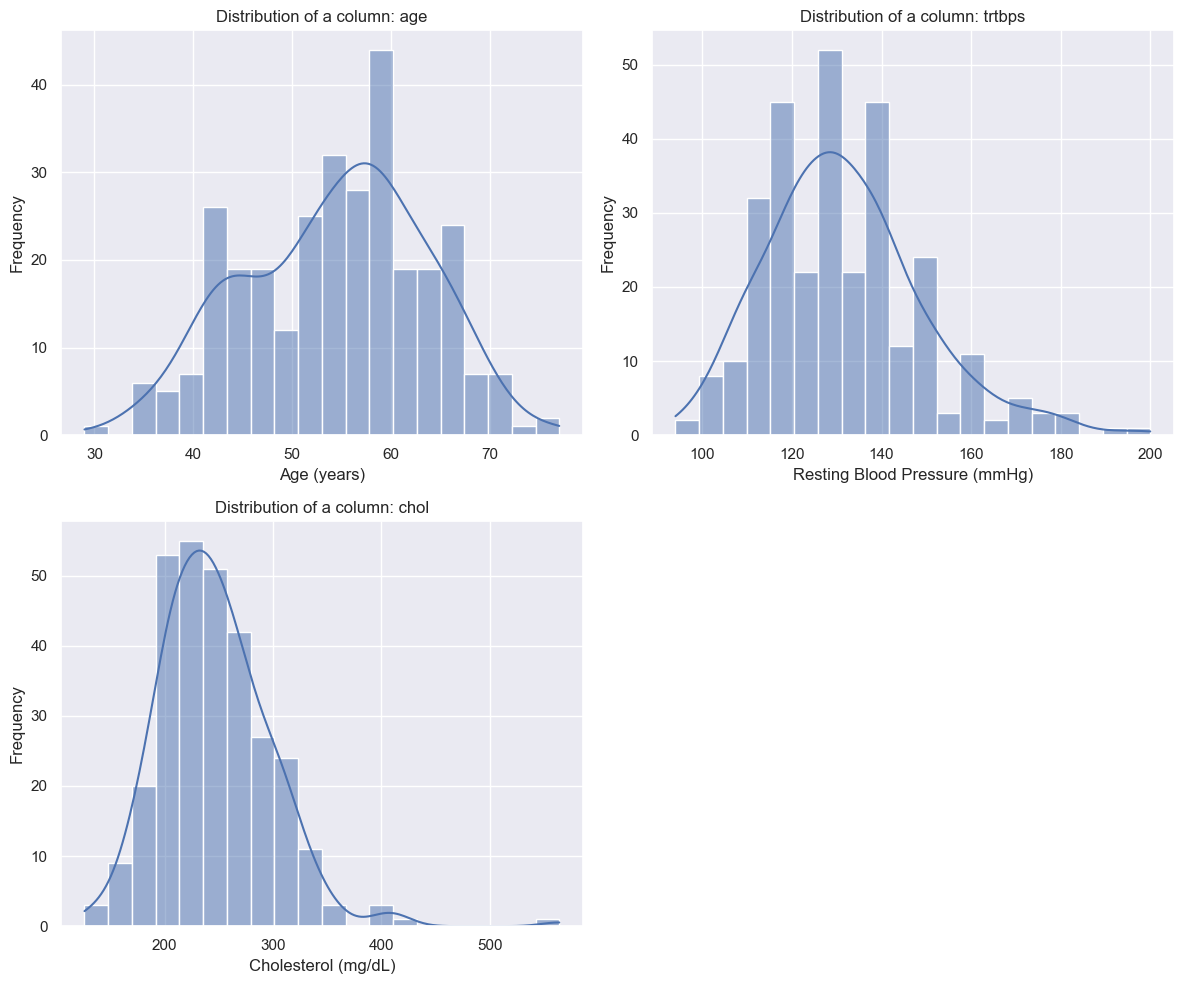

# Sub Task 3: Show Distribution of Different Categorical Variables (2 marks)

* Show distribution of values for sex, cp, fbs, restecg, exang and slope



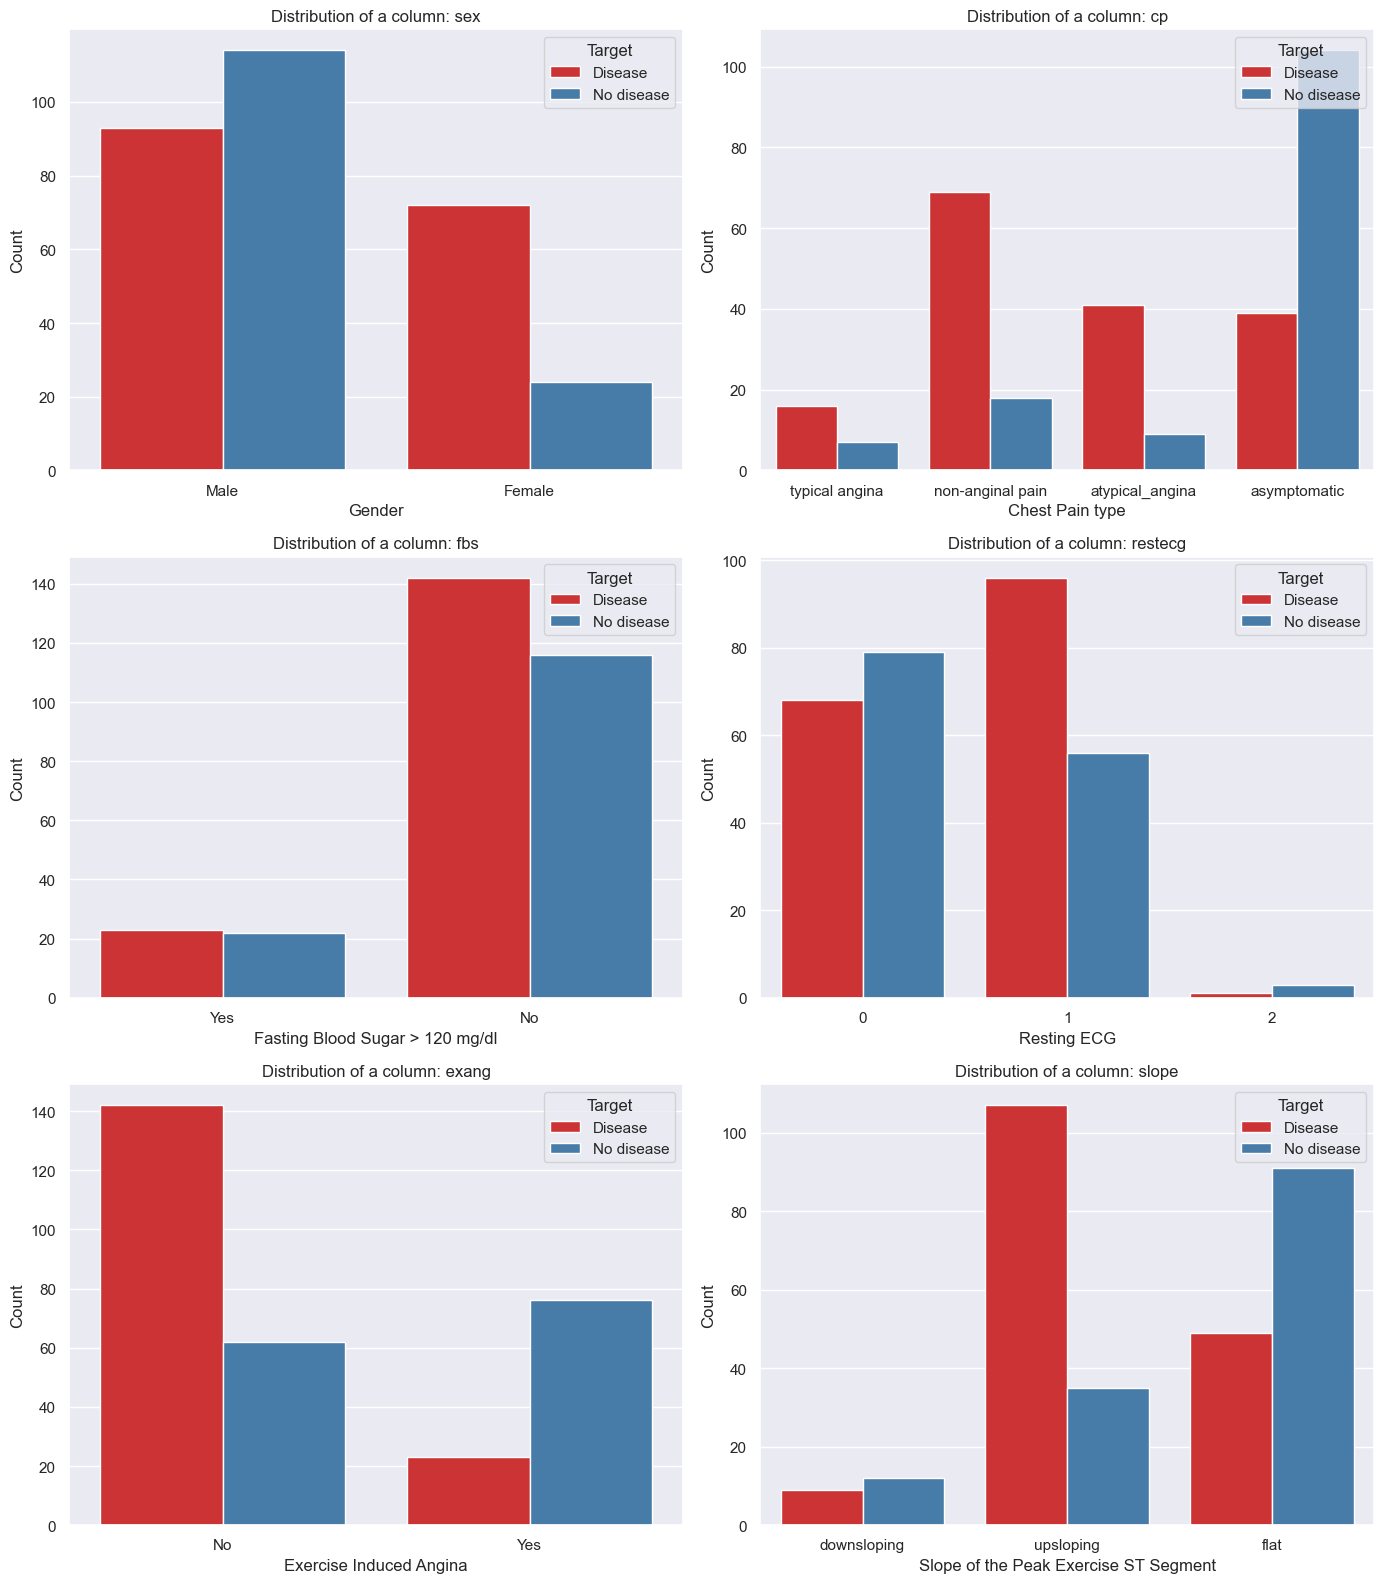

# Sub Task 4: Create Box Plots (2 marks)

Create box plots to visualise the distribution of cholesterol and age by gender for disease and no disease group. 

<Figure size 1500x1000 with 0 Axes>

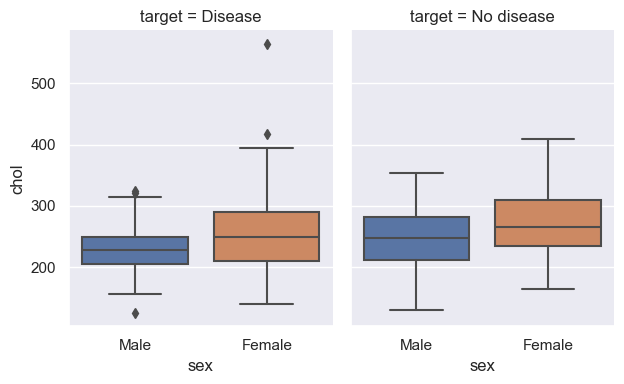

<Figure size 1500x1000 with 0 Axes>

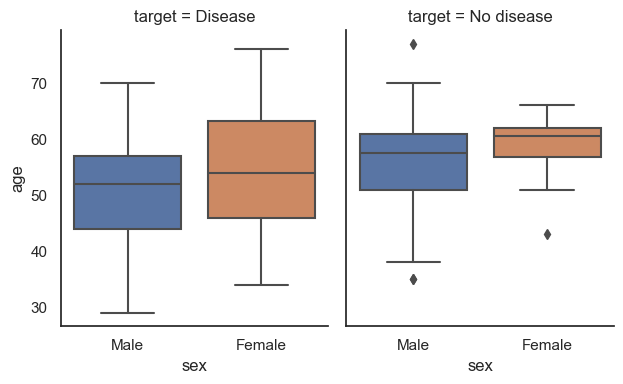

# Sub Task 5: Linear Relationship Plots (2 marks)

Use linear relationship plots to  understand the following:
1. The relationship between age and chol in each of the target, based on sex.
2. The relationship between age and chol in each of the sex, based on target.


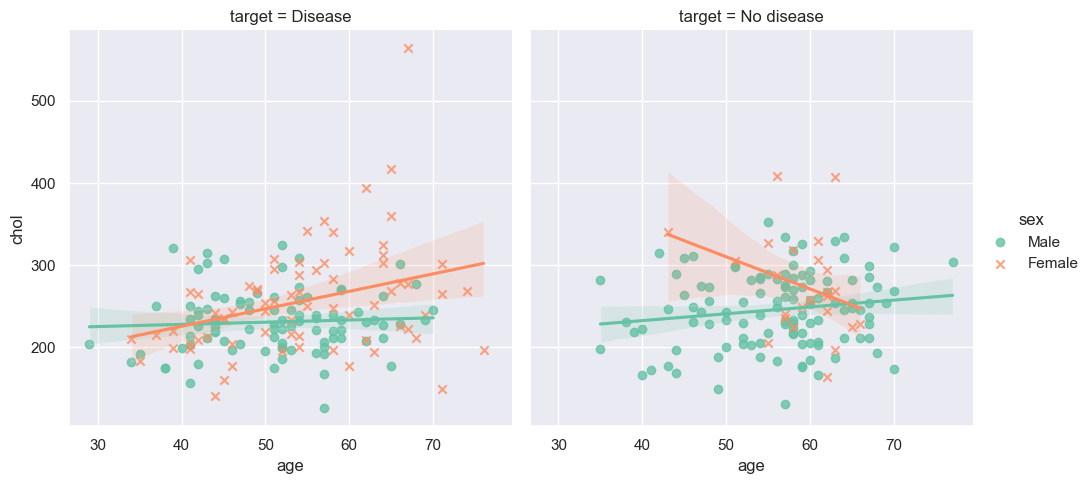

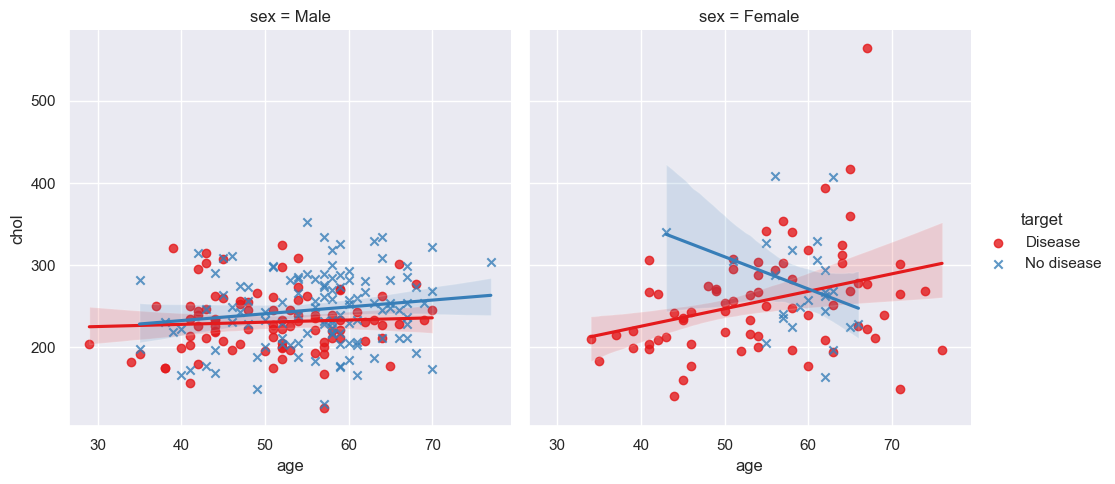

# Sub Task 6: Create a Pairplot (1 mark)

Create a pairplot with the columns: age, chol, thal, oldpeak, trtbps.


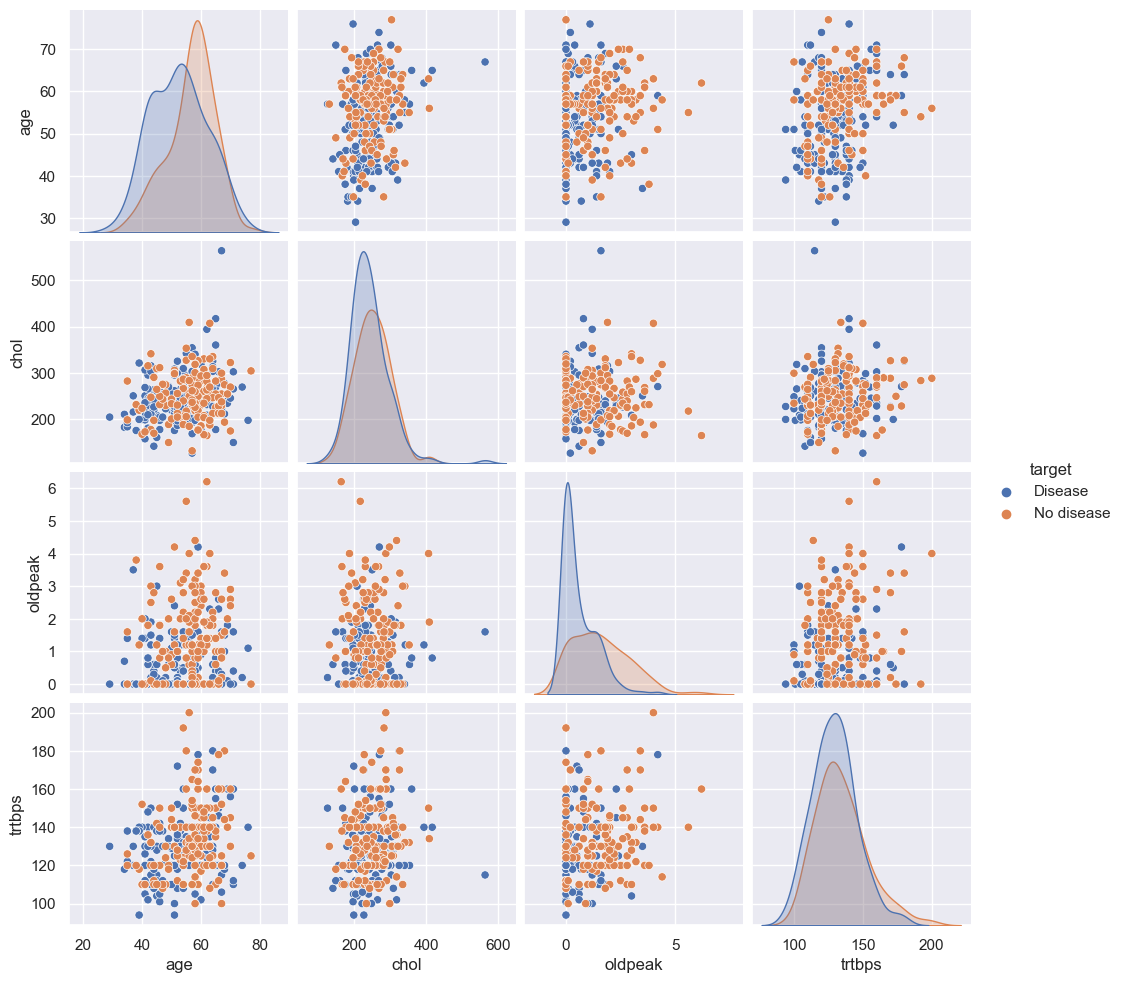

# Sub Task 7: Create Heatmap (2 marks)

1 Using the 6 selected region DataFrame, create a heatmap of the correlation matrix created when using the .corr() method on the transactions dataframe. Use the 'BuPu' color palette.

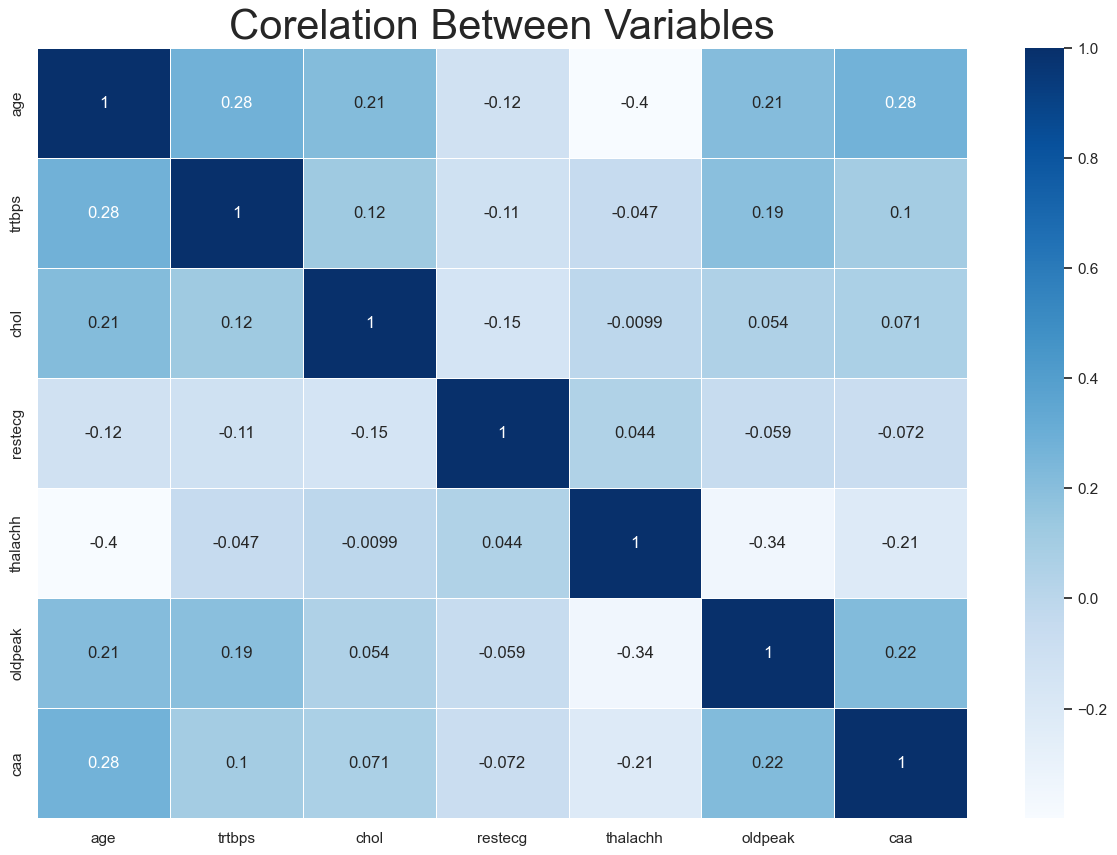

# Sub Task 8: Conclusion (2 marks)

Summarise your data exploratory task in one or 2 paragraph(s)
